# instalar Detectron2 en Colab

In [ ]:
import torch
print("Torch version:", torch.__version__, "CUDA:", torch.version.cuda)

Torch version: 2.8.0+cu126 CUDA: 12.6


In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-qtly750l
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-qtly750l
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.1 MB/s eta 0:00:00

y
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6352439 sha256=501861bbc092bdfc688110e5ea980baf06b75ed8d1304a85d3f9561ee467b7c1
  Stored in directory: /tmp/pip-ephem-wheel-cache-gm4olxkl/wheels/d3/6e/bd/1969578f1456a6

# importaciones y setup

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import detectron2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.utils.logger import setup_logger

In [ ]:
setup_logger()

<Logger detectron2 (DEBUG)>

# configurar el modelo

In [ ]:
cfg = get_cfg()

In [ ]:
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

In [ ]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

In [ ]:
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

In [ ]:
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
predictor = DefaultPredictor(cfg)

[11/19 05:43:18 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


model_final_280758.pkl: 167MB [00:01, 117MB/s]                           


# cargar una imagen y hacer predicción

In [ ]:
!gdown 1QsOpd2lTvaf6wes9bRUl0RUTj2oMT9KN

Downloading...
From: https://drive.google.com/uc?id=1QsOpd2lTvaf6wes9bRUl0RUTj2oMT9KN
To: /content/imagen.jpg
100% 383k/383k [00:00<00:00, 79.1MB/s]


In [ ]:
im = cv2.imread("imagen.jpg")
outputs = predictor(im)

/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


# visualizar resultados

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
result_image = out.get_image()[:, :, ::-1]

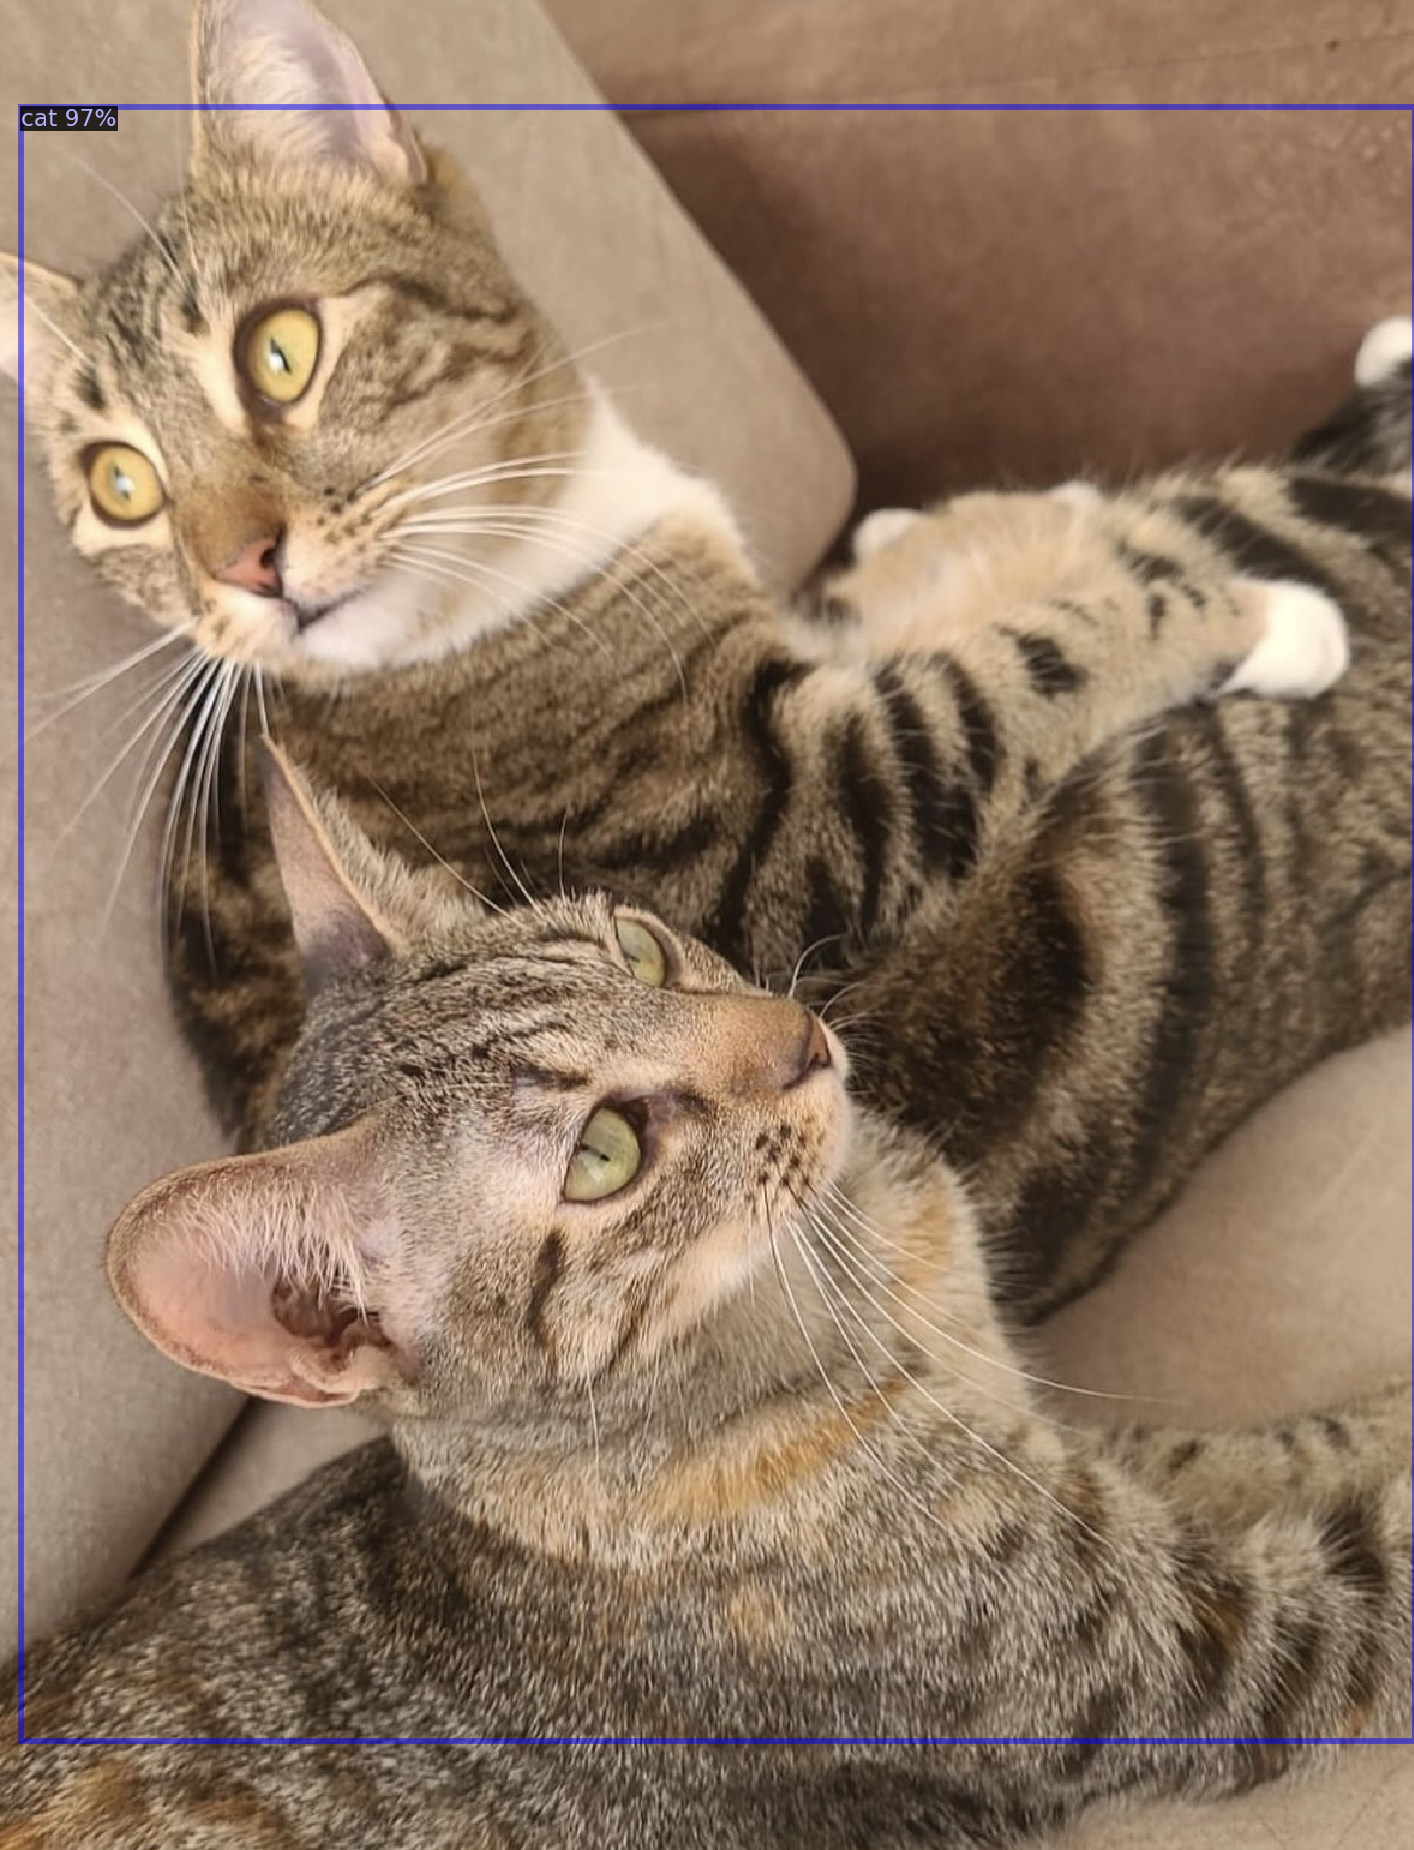

In [ ]:
cv2_imshow(result_image)